# 목차
---
- [컨볼루션 연산 구현](#Make-Convolution-Function)

- [컬러 이미지에 컨볼루션 연산](#convolution-on-color-image)

- [회색 이미지에 컨볼루션, 가버커널 분석](#convolution-on-grayscale-image-and-analyse-Gabor)<br/>
&nbsp; [convolution on grayscale image](#convolution-on-grayscale-image)<br/>
&nbsp; [Analyse Gabor kernel](#Analyse-Gabor-kernel)

- [테두리 검출](#Edge-Detection)<br/>
&nbsp; [Edge detection using threshold](#Edge-detection-using-threshold)<br/>
&nbsp; [Edge detection on every gradient](#Edge-detection-on-every-gradient)

참고 [sobel filter 수평, 수직 비교](#sobel-filter-수평,-수직-비교)

In [135]:
from matplotlib import pyplot as plt
import numpy as np
import glob
import cv2

seed = 42
cv2.setRNGSeed(seed)
np.random.seed(seed)

In [51]:
pi = np.pi
gabor = cv2.getGaborKernel((3,3),pi,pi,pi,pi)
gabor

array([[ 5.24272533e-01, -9.75375692e-17, -5.24272533e-01],
       [ 8.64379277e-01,  6.12323400e-17, -8.64379277e-01],
       [ 5.24272533e-01,  1.71816152e-16, -5.24272533e-01]])

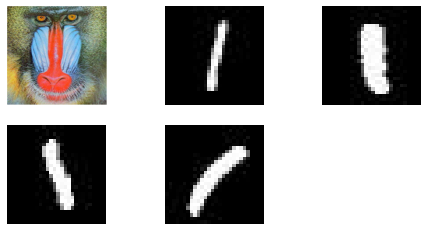

In [3]:
im_path = "./images/*.jpg"

def im_pro(file):
    im = cv2.imread(file)
    b,g,r = cv2.split(im)
    return cv2.merge([r,g,b])

ims = np.array([im_pro(file) for file in glob.glob(im_path)])

plt.figure(figsize=(8,4))
for i in range(len(ims)):
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(ims[i])
plt.show()

Make Convolution Function
===

In [143]:
def rot(data):
    rotated_data = np.zeros((np.shape(data)[1],np.shape(data)[0]))
    for i in range(len(data)):
        for j in range(len(data[i])):
            rotated_data[len(data[i])-j-1][i] = data[i][j]
    return rotated_data

def conv(data,kernel_size=3,kernel=None,rotate=None,sigma=1,theta=0,lambd=np.pi*2,gamma=np.pi/2,psi=1):
    if(not(kernel_size>=1 and kernel_size%2 and type(kernel_size)==int)):
        print('kernel_size is not odd positive int')
        return data
    
    if(rotate):
        data = rot(data)
    
    kernel_side = kernel_size//2
    if(kernel=='Gabor'):
        kernel = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,lambd,gamma,psi)
    elif(type(kernel)!=type(np.array([]))):
        kernel = np.array([[-1 for j in range(kernel_size)] for i in range(kernel_size)])
        kernel[kernel_side+1][kernel_side+1] = kernel_size**2-1
        #print(kernel)
    kernel_size = len(kernel)
    
    try:
        conved_data = np.zeros((np.shape(data)[0]-kernel_side,np.shape(data)[1]-kernel_side))
        #print(np.shape(conved_data))
        for r in range(kernel_side,np.shape(data)[0]-kernel_side):
            for c in range(kernel_side,np.shape(data)[1]-kernel_side):
                conved_data[r-kernel_side][c-kernel_side] = np.sum(data[r-kernel_side:r+kernel_side+1, c-kernel_side:c+kernel_side+1]*kernel)
        return conved_data
    except:
        print('worng kernel')
        return data

# convolution on color image
---
#### 1) split image to r,g,b data
#### 2) convolution on each r,g,b data
#### 3) merge r,g,b to color image

(266, 267, 3)
(266, 267)


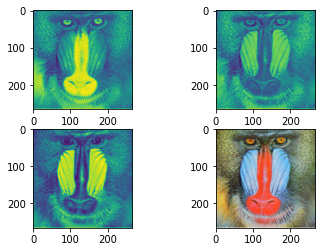

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


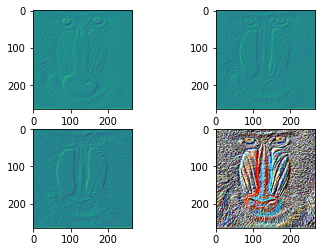

In [5]:
#1) split image
data = ims[0]
print(np.shape(data))
r,g,b = cv2.split(data)
#data = data.reshape((3,28,28))
print(np.shape(b))
plt.subplot(2,2,1)
plt.imshow(r)
plt.subplot(2,2,2)
plt.imshow(g)
plt.subplot(2,2,3)
plt.imshow(b)
plt.subplot(2,2,4)
plt.imshow(cv2.merge([r,g,b]))
plt.show()

#2) convolution on each r,g,b
conved_r = conv(r)
conved_g = conv(g)
conved_b = conv(b)


plt.subplot(2,2,1)
plt.imshow(conved_r)
plt.subplot(2,2,2)
plt.imshow(conved_g)
plt.subplot(2,2,3)
plt.imshow(conved_b)
plt.subplot(2,2,4)
#3) merge r,g,b
plt.imshow(cv2.merge([conved_r,conved_g,conved_b]))
plt.show()

convolution on grayscale image and analyse Gabor
===

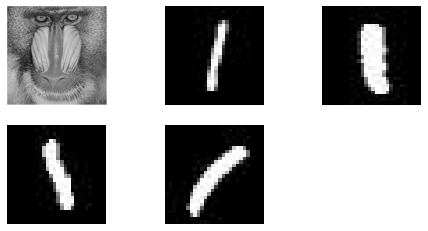

In [7]:
im_path = "./images/*.jpg"

ims = np.array([cv2.imread(file,0) for file in glob.glob(im_path)])

plt.figure(figsize=(8,4))
for i in range(len(ims)):
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(ims[i],cmap='gray')
plt.show()

## convolution on grayscale image

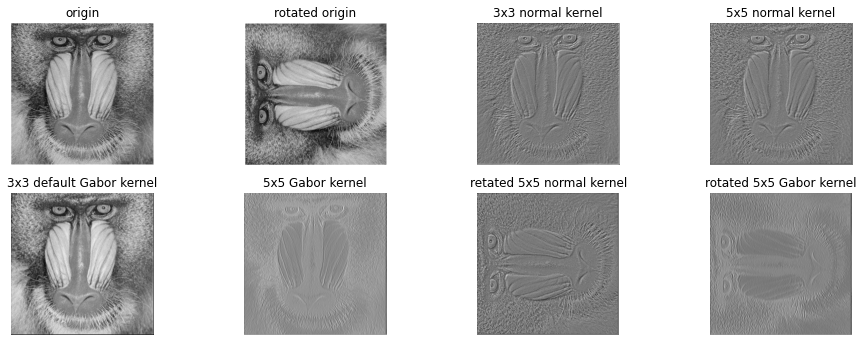

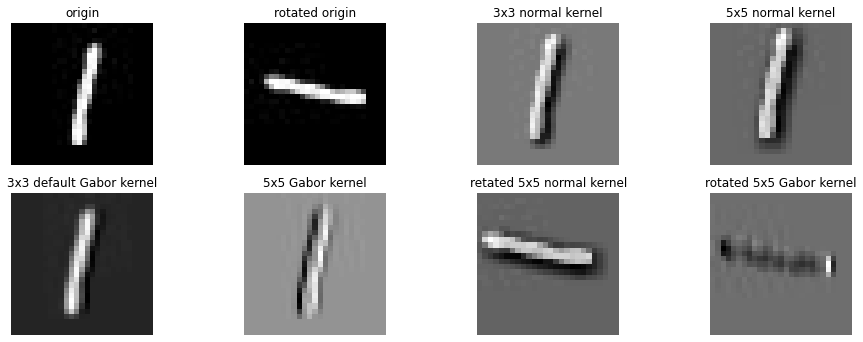

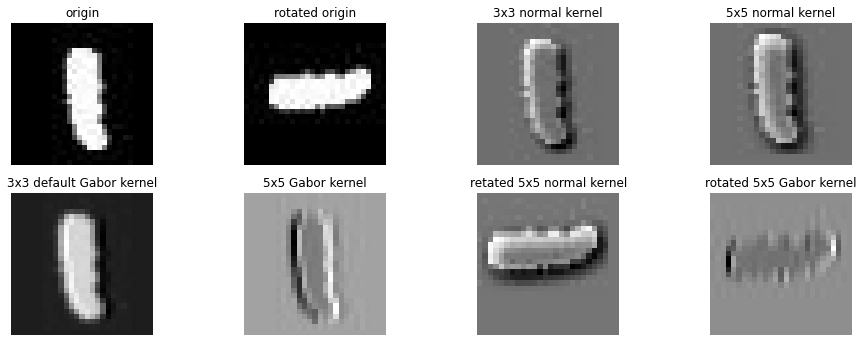

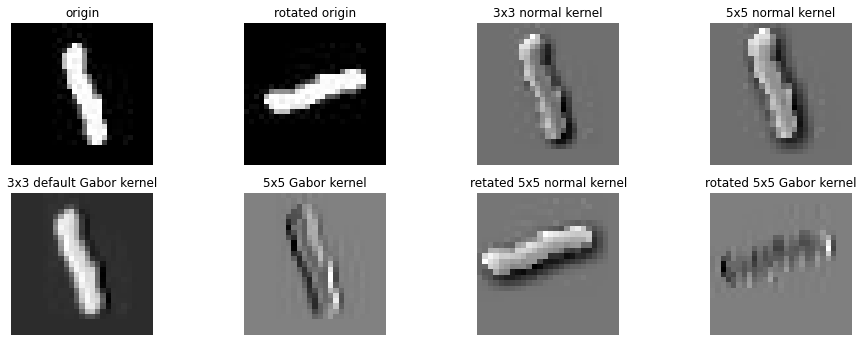

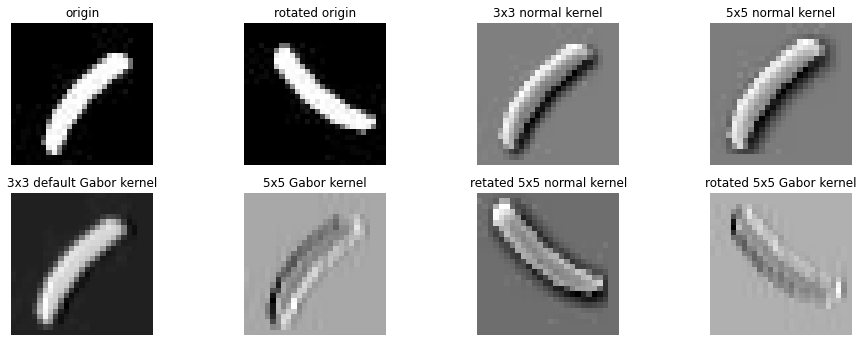

In [8]:
for im in ims:
    plt.figure(figsize=(16,12))
        
    plt.subplot(4,4,1)
    plt.title('origin')
    plt.axis('off')
    plt.imshow(im,cmap='gray')

    plt.subplot(4,4,2)
    plt.title('rotated origin')
    plt.axis('off')
    plt.imshow(rot(im),cmap='gray')
    
    plt.subplot(4,4,3)
    plt.title('3x3 normal kernel')
    plt.axis('off')
    plt.imshow(conv(im,kernel_size=3),cmap='gray')
        
    kernel_size=5
    plt.subplot(4,4,4)
    plt.title('{0}x{0} normal kernel'.format(kernel_size))
    plt.axis('off')
    plt.imshow(conv(im,kernel_size=kernel_size),cmap='gray')
        
    plt.subplot(4,4,5)
    plt.title('3x3 default Gabor kernel')
    plt.axis('off')
    plt.imshow(conv(im,kernel='Gabor'),cmap='gray')
    
    Gabor_kernel_size=3
    sigma=1
    theta=0
    lambd=np.pi/8
    gamma=0
    psi=1
    
    plt.subplot(4,4,6)
    plt.title('{0}x{0} Gabor kernel'.format(kernel_size))
    plt.axis('off')
    plt.imshow(conv(im,kernel_size=Gabor_kernel_size,kernel='Gabor',sigma=sigma,theta=theta,lambd=lambd,gamma=gamma,psi=psi),cmap='gray')
    
    plt.subplot(4,4,7)
    plt.title('retated {0}x{0} normal kernel'.format(kernel_size))
    plt.axis('off')
    plt.imshow(conv(im,kernel_size=kernel_size,rotate=True),cmap='gray')
    
    plt.subplot(4,4,8)
    plt.title('rotated {0}x{0} Gabor kernel'.format(kernel_size))
    plt.axis('off')
    plt.imshow(conv(im,kernel_size=Gabor_kernel_size,rotate=True,kernel='Gabor',sigma=sigma,theta=theta,lambd=lambd,gamma=gamma,psi=psi),cmap='gray')
    
    plt.show()

# Analyse Gabor kernel

---

## Gabor Filter

- 간단하게 설명하면 사인파로 변형된 가우시안 필터

텍스처 분석에서 특정 점이나 영역에서 이미지의 특정 방향에 특정 주파수 성분이 존재하는지 여부를 분석하는데 사용될 수 있다.<br/>
인간의 시각 시스템과 유사하며 텍스처 유사성과 차이점에 특히 적합한것으로 밝혀져있다.

##### 출처 : Gabor filter Wiki<br/>https://en.wikipedia.org/wiki/Gabor_filter

---

>### OpenCV gabor kernel

>Returns Gabor filter coefficients.<br/>
For more details about gabor filter equations and parameters<br/>
#### Parameters
    - ksize	Size of the filter returned.
    - sigma	Standard deviation of the gaussian envelope.
    - theta	Orientation of the normal to the parallel stripes of a Gabor function.
    - lambd	Wavelength of the sinusoidal factor.
    - gamma	Spatial aspect ratio.
    - psi	Phase offset.  (psi=CV_PI*0.5)
    - ktype	Type of filter coefficients. It can be CV_32F or CV_64F.  (ktype = CV_64F)

>cv.getGaborKernel(	ksize, sigma, theta, lambd, gamma[, psi[, ktype]]	)

##### 출처 : OpenCV documantation<br/>https://docs.opencv.org/4.5.3/d4/d86/group__imgproc__filter.html#gae84c92d248183bd92fa713ce51cc3599

---
sigma : 가우시안분포의 표준편차 - Kernel 너비<br/>
theta : Gabor 함수의 방향 - theta에따라 라디안 단위로 회전<br/>
lambd : 사인파 주기 - Gabor Kernel에 0~lambd 까지의 사인파가 사용됨<br/>
gamma : 위상 오프셋 - Gabor filter가 얼마나 이동하는지 나타내는 값이라고한다<br/>
psi : 공간 종횡비 - Gabor Kernel의 종횡비, 타원도를 정함

##### 참조 : 인터넷 블로그 "Gabor Filter 이해하기"<br/>https://thinkpiece.tistory.com/304

In [262]:
kernel_size=5
sigma=1
theta=0
lambd=np.pi
gamma=np.pi
psi=1

kernel1 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,lambd,gamma,psi)
kernel2 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,lambd,gamma,psi)
kernel3 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,lambd,gamma,psi)

print(kernel1==kernel2,end='\n\n')
print(kernel2==kernel3)

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]

[[ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]
 [ True  True  True  True  True]]


In [237]:
#sigma가 다른 값
#표준편차만 바뀌기 때문에 정 중앙값은 동일하다(가우시안 분포 특성)

kernel1 = cv2.getGaborKernel((kernel_size,kernel_size),0.1,theta,lambd,gamma,psi)
kernel2 = cv2.getGaborKernel((kernel_size,kernel_size),1,theta,lambd,gamma,psi)
kernel3 = cv2.getGaborKernel((kernel_size,kernel_size),5,theta,lambd,gamma,psi)

print(kernel1==kernel2,end='\n\n')
print(kernel1==kernel3)

[[False False False False False]
 [False False False False False]
 [False False  True False False]
 [False False False False False]
 [False False False False False]]

[[False False False False False]
 [False False False False False]
 [False False  True False False]
 [False False False False False]
 [False False False False False]]


In [238]:
#theta
#theta 값에 따라 회전(축이 회전하는 것을 볼 수 있다 - 여러 이유로 회전 시켜도 다른 값이 약간 다를 수 있다)

kernel_size=5
sigma=1
theta=0
lambd=np.pi*4
gamma=0
psi=1

kernel1 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,0,lambd,gamma,psi)
kernel2 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,np.pi/2,lambd,gamma,psi)
kernel3 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,np.pi,lambd,gamma,psi)

print(kernel1==kernel2,end='\n\n')
print(kernel1==kernel3)

[[ True False False False False]
 [False  True False False False]
 [False False  True False False]
 [False False False  True False]
 [False False False False  True]]

[[False False False False False]
 [False False  True False False]
 [False False  True False False]
 [False False  True False False]
 [False False  True False False]]


In [270]:
#lambd가 다른 값
#파형이 변한다(세로 한줄씩 동일한걸 알 수 있다 - 사인파 특성)

kernel1 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,np.pi,gamma,psi)
kernel2 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,np.pi/2,gamma,psi)
kernel3 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,np.pi*2,gamma,psi)

print(kernel1>=kernel2,end='\n\n')
print(kernel1>=kernel3)

[[ True False  True  True False]
 [ True False  True  True False]
 [ True False  True  True False]
 [ True False  True  True False]
 [ True False  True  True False]]

[[ True False  True False False]
 [ True False  True False False]
 [ True False  True False False]
 [ True False  True False False]
 [ True False  True False False]]


In [258]:
#gamma가 다른 값
#pi값을 기준으로 작을때와 클때 큰 데이터의 위치가 다르다

kernel1 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,lambd,np.pi,psi)
kernel2 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,lambd,np.pi/2,psi)
kernel3 = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,lambd,np.pi*2,psi)

print(kernel1>=kernel2,end='\n\n')
print(kernel1>=kernel3)

[[False  True False False  True]
 [False  True False False  True]
 [ True  True  True  True  True]
 [False  True False False  True]
 [False  True False False  True]]

[[ True False  True  True False]
 [ True False  True  True False]
 [ True  True  True  True  True]
 [ True False  True  True False]
 [ True False  True  True False]]


# Edge Detection
---
이미지에서 edge란, 상대적으로 다른 명함도를 가진 두 영역 간의 경계를 의미한다.<br/>
따라서 명암값이 급격하게 변하는 지점, 미분을 통해 데이터의 기울기가 큰 지점을 edge로 선택하면 효과적인 edge detection이 가능하다.<br/>
단, 이미지는 연속된 값이 아닌 이진화된 데이터이기 때문에 미분을 진행하지 않고 필터링을 통해 특정 위치에서의 변화율을 계산하고 해당 값을 임계값을 기준으로 edge인지 여부를 판단하는 것을 통해 edge detection을 진행한다.

---

이번에는 sobel filter를 이용해 수평 edge detection을 진행하고 비교한다.<br/><br/>

##### sobel filter
[[1],[1],[1]]의 smoothing 효과와 [-1,0,1]의 미분이 결합된 prewitt filter에서 edge를 더욱 부각하기 위해 밝기 변화를 강화한 필터이다.

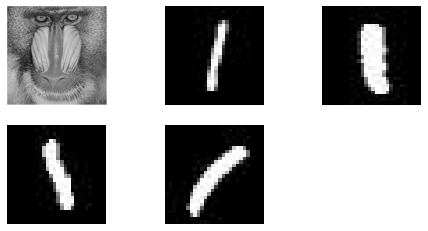

In [9]:
def thresholding(data,threshold):
    try:
        return np.where(data>threshold,255,0)
    except:
        print("worng input")
        return data

def rot(data):
    rotated_data = np.zeros((np.shape(data)[1],np.shape(data)[0]))
    for i in range(len(data)):
        for j in range(len(data[i])):
            rotated_data[len(data[i])-j-1][i] = data[i][j]
    return rotated_data

def conv(data,kernel_size=3,kernel=None,rotate=None,sigma=1,theta=0,lambd=np.pi*2,gamma=np.pi/2,psi=1):
    if(not(kernel_size>=1 and kernel_size%2 and type(kernel_size)==int)):
        print('kernel_size is not odd positive int')
        return data
    
    if(rotate):
        data = rot(data)
    
    kernel_side = kernel_size//2
    if(kernel=='Gabor'):
        kernel = cv2.getGaborKernel((kernel_size,kernel_size),sigma,theta,lambd,gamma,psi)
    elif(type(kernel)!=type(np.array([]))):
        kernel = np.array([[-1 for j in range(kernel_size)] for i in range(kernel_size)])
        kernel[kernel_side+1][kernel_side+1] = kernel_size**2-1
        #print(kernel)
    kernel_size = len(kernel)
    
    try:
        conved_data = np.zeros((np.shape(data)[0]-kernel_side,np.shape(data)[1]-kernel_side))
        #print(np.shape(conved_data))
        for r in range(kernel_side,np.shape(data)[0]-kernel_side):
            for c in range(kernel_side,np.shape(data)[1]-kernel_side):
                conved_data[r-kernel_side][c-kernel_side] = np.sum(data[r-kernel_side:r+kernel_side+1, c-kernel_side:c+kernel_side+1]*kernel)
        return conved_data
    except:
        print('worng kernel')
        return data

im_path = "./images/*.jpg"

ims = np.array([cv2.imread(file,0) for file in glob.glob(im_path)])

plt.figure(figsize=(8,4))
for i in range(len(ims)):
    plt.subplot(2,3,i+1)
    plt.axis('off')
    plt.imshow(ims[i],cmap='gray')
plt.show()

## Edge detection using threshold
---
이러한 필터를 적용하면 회색조 이미지가 출력되고 정확히 edge detection이 이루어진 상태인지 확인하기 위해 threshold 기반 처리를 통해 edge만 남겨줄 수 있다.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


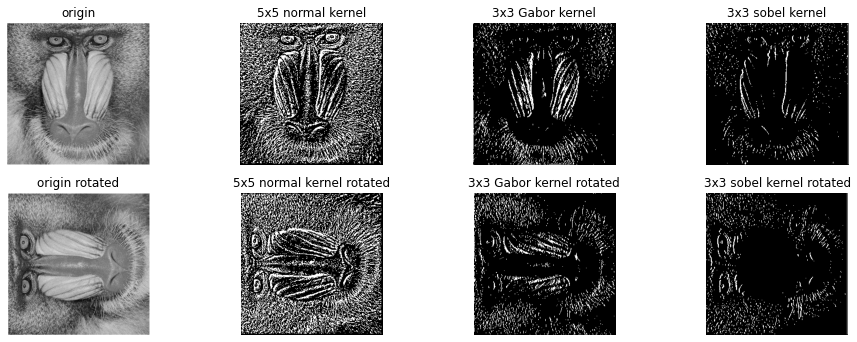

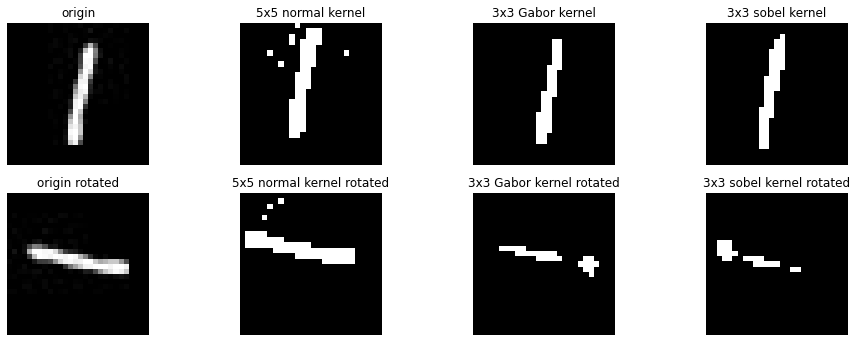

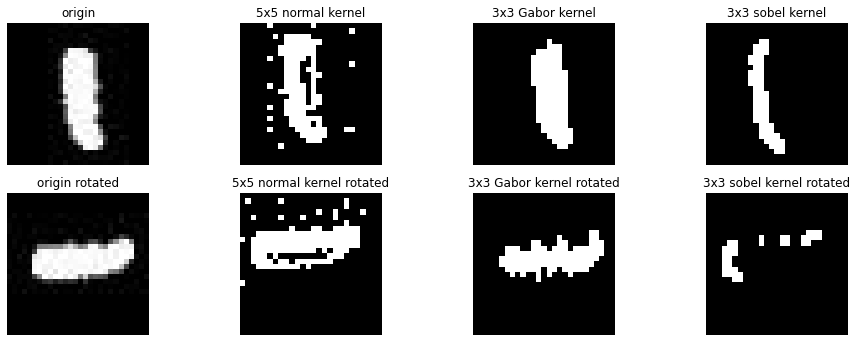

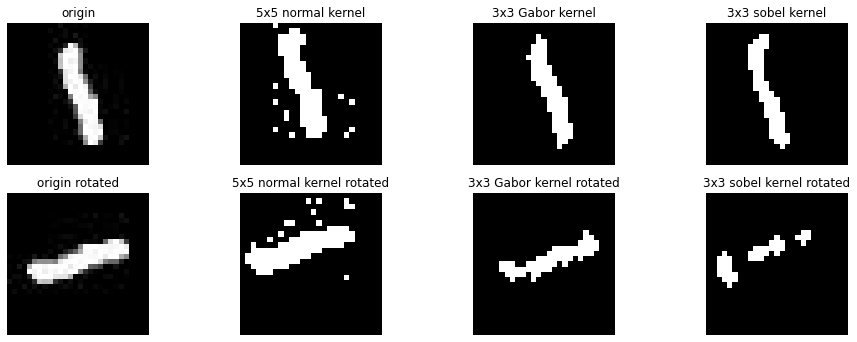

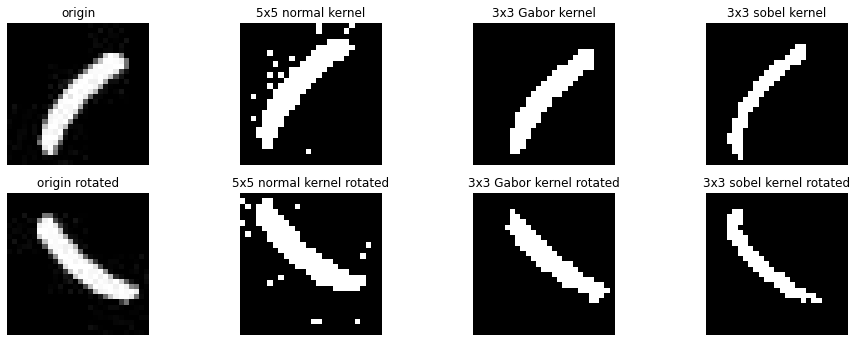

In [146]:
for im in ims:
    plt.figure(figsize=(16,12))
    
    #original image
    plt.subplot(4,4,1)
    plt.title('origin')
    plt.axis('off')
    plt.imshow(im,cmap='gray')
    
    #normal filter(high pass filter)
    kernel_size=5
    
    conved_data = conv(im,kernel_size=kernel_size)
    detected_data = thresholding(conved_data,threshold=150)
    
    plt.subplot(4,4,2)
    plt.title('{0}x{0} normal kernel'.format(kernel_size))
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #Gabor filter
    Gabor_kernel_size=3
    sigma=1
    theta=np.pi
    lambd=np.pi
    gamma=np.pi/8
    psi=1
    
    conved_data = conv(im,kernel_size=Gabor_kernel_size,kernel='Gabor',sigma=sigma,theta=theta,lambd=lambd,gamma=gamma,psi=psi)
    detected_data = thresholding(conved_data,threshold=150)
    
    plt.subplot(4,4,3)
    plt.title('{0}x{0} Gabor kernel'.format(Gabor_kernel_size))
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #sobel filter and standard thresholding
    sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    conved_data = conv(im,kernel=sobel_kernel)
    detected_data = thresholding(conved_data,threshold=150)
    
    plt.subplot(4,4,4)
    plt.title('3x3 sobel kernel')
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    
    #rotated image
    #original image
    plt.subplot(4,4,5)
    plt.title('origin rotated')
    plt.axis('off')
    plt.imshow(rot(im),cmap='gray')
    
    #normal filter(high pass filter)
    kernel_size=5
    
    conved_data = conv(im,rotate=True,kernel_size=kernel_size)
    detected_data = thresholding(conved_data,threshold=150)
    
    plt.subplot(4,4,6)
    plt.title('{0}x{0} normal kernel rotated'.format(kernel_size))
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #Gabor filter
    Gabor_kernel_size=3
    sigma=1
    theta=np.pi
    lambd=np.pi
    gamma=np.pi/8
    psi=1
    
    conved_data = conv(im,rotate=True,kernel_size=Gabor_kernel_size,kernel='Gabor',sigma=sigma,theta=theta,lambd=lambd,gamma=gamma,psi=psi)
    detected_data = thresholding(conved_data,threshold=150)
    
    plt.subplot(4,4,7)
    plt.title('{0}x{0} Gabor kernel rotated'.format(Gabor_kernel_size))
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #sobel filter and standard thresholding
    sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    conved_data = conv(im,rotate=True,kernel=sobel_kernel)
    detected_data = thresholding(conved_data,threshold=150)
    
    plt.subplot(4,4,8)
    plt.title('3x3 sobel kernel rotated')
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    plt.show()
    print()

## Edge detection on every gradient
---
단순 thresholding을 실시하면 제대로 edge detection이 진행되지 않은 것처럼 보이는데 이는 방법에 따라 모든 edge가 아니라 한방향의 기울기(음->양, 양->음)만 처리하기 때문이다.<br/>
실제 edge는 둘 모두 포함되기 때문에 둘 모두 처리해주는 방식

In [150]:
def between_thresholding(conved_data,min_thr,max_thr):
    try:
        return np.where(((conved_data>min_thr) & (conved_data<max_thr)),255,0)
    except:
        print("worng input")
        return data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


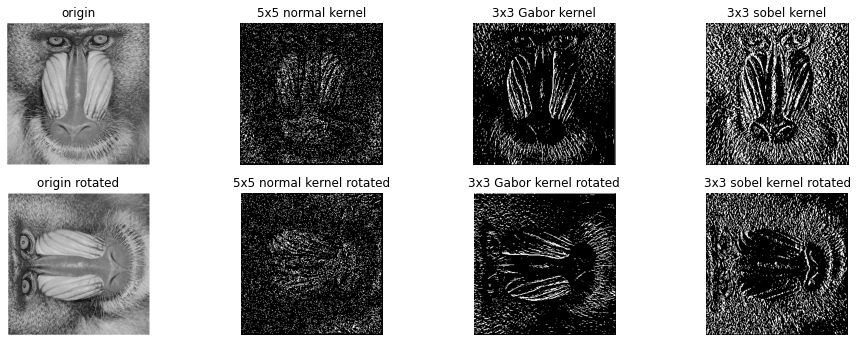

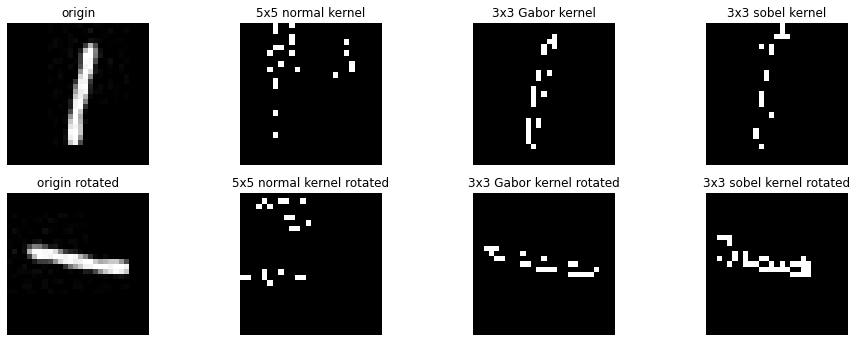

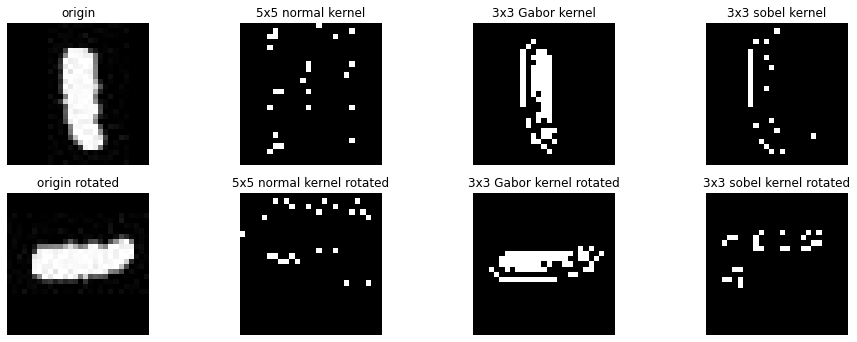

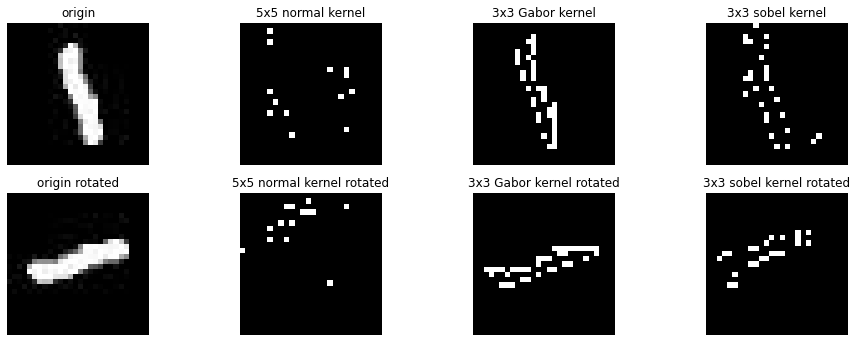

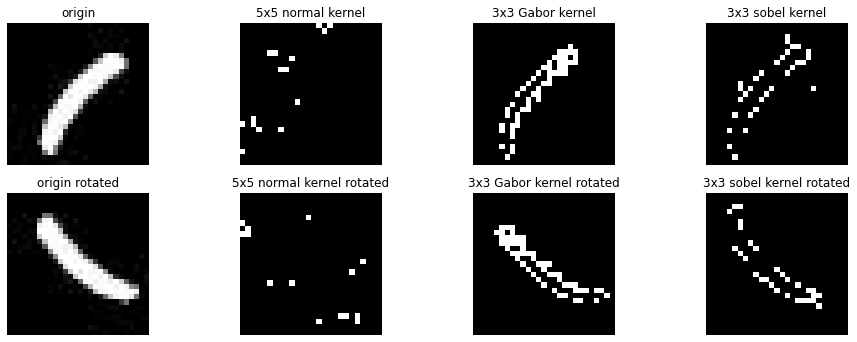

In [151]:
for im in ims:
    plt.figure(figsize=(16,12))
    
    min_thr = 75
    max_thr = 200
    
    #original image
    plt.subplot(4,4,1)
    plt.title('origin')
    plt.axis('off')
    plt.imshow(im,cmap='gray')
    
    #normal filter(high pass filter)
    kernel_size=5
    
    conved_data = conv(im,kernel_size=kernel_size)
    detected_data = between_thresholding(conved_data,min_thr=min_thr,max_thr=max_thr)
    
    plt.subplot(4,4,2)
    plt.title('{0}x{0} normal kernel'.format(kernel_size))
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #Gabor filter
    Gabor_kernel_size=3
    sigma=1
    theta=np.pi
    lambd=np.pi/2
    gamma=np.pi/8
    psi=1
    
    conved_data = conv(im,kernel_size=Gabor_kernel_size,kernel='Gabor',sigma=sigma,theta=theta,lambd=lambd,gamma=gamma,psi=psi)
    detected_data = between_thresholding(conved_data,min_thr=min_thr,max_thr=max_thr)
    
    plt.subplot(4,4,3)
    plt.title('{0}x{0} Gabor kernel'.format(Gabor_kernel_size))
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #sobel filter and standard thresholding
    sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    conved_data = conv(im,kernel=sobel_kernel)
    detected_data = between_thresholding(conved_data,min_thr=30,max_thr=220)
    
    plt.subplot(4,4,4)
    plt.title('3x3 sobel kernel')
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    
    #rotated image
    #original image
    plt.subplot(4,4,5)
    plt.title('origin rotated')
    plt.axis('off')
    plt.imshow(rot(im),cmap='gray')
    
    #normal filter(high pass filter)
    kernel_size=5
    
    conved_data = conv(im,rotate=True,kernel_size=kernel_size)
    detected_data = between_thresholding(conved_data,min_thr=min_thr,max_thr=max_thr)
    
    plt.subplot(4,4,6)
    plt.title('{0}x{0} normal kernel rotated'.format(kernel_size))
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #Gabor filter
    Gabor_kernel_size=3
    sigma=1
    theta=np.pi/2
    lambd=np.pi/2
    gamma=np.pi/8
    psi=1
    
    conved_data = conv(im,rotate=True,kernel_size=Gabor_kernel_size,kernel='Gabor',sigma=sigma,theta=theta,lambd=lambd,gamma=gamma,psi=psi)
    detected_data = between_thresholding(conved_data,min_thr=min_thr,max_thr=max_thr)
    
    plt.subplot(4,4,7)
    plt.title('{0}x{0} Gabor kernel rotated'.format(Gabor_kernel_size))
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #sobel filter and standard thresholding
    sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    conved_data = conv(im,rotate=True,kernel=sobel_kernel)
    detected_data = between_thresholding(conved_data,min_thr=50,max_thr=200)
    
    plt.subplot(4,4,8)
    plt.title('3x3 sobel kernel rotated')
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    plt.show()
    print()

##### sobel filter 수평, 수직 비교
실제로 필터의 방향이 수평이냐 수직이냐에 따라 원본과 90도 회전 이미지의 edge detection 성능이 바뀌는 것을 확인할 수 있다.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


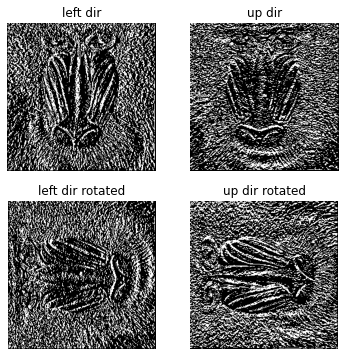

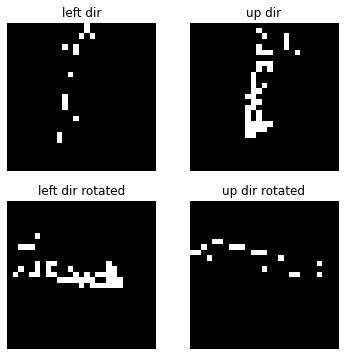

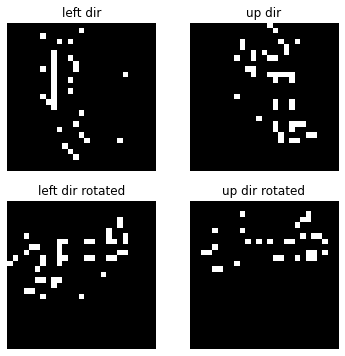

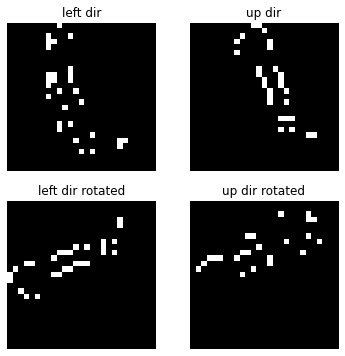

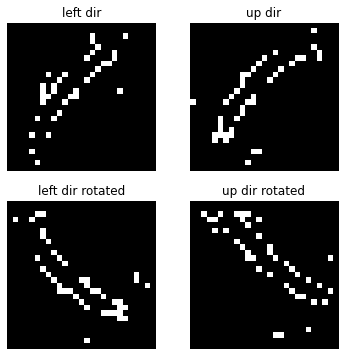

In [159]:
#참고용 sobel filter

for im in ims:
    plt.figure(figsize=(6,6))
    
    min_thr = 25
    max_thr = 175
    
    #수평
    sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    conved_data = conv(im,kernel=sobel_kernel)
    detected_data = between_thresholding(conved_data,min_thr=min_thr,max_thr=max_thr)
    
    plt.subplot(2,2,1)
    plt.title('left dir')
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #수직
    sobel_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    conved_data = conv(im,kernel=sobel_kernel)
    detected_data = between_thresholding(conved_data,min_thr=min_thr,max_thr=max_thr)
    
    plt.subplot(2,2,2)
    plt.title('up dir')
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    
    #rotated image
    #수평
    sobel_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    conved_data = conv(im,rotate=True,kernel=sobel_kernel)
    detected_data = between_thresholding(conved_data,min_thr=min_thr,max_thr=max_thr)
    
    plt.subplot(2,2,3)
    plt.title('left dir rotated')
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    #수직
    sobel_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    conved_data = conv(im,rotate=True,kernel=sobel_kernel)
    detected_data = between_thresholding(conved_data,min_thr=min_thr,max_thr=max_thr)
    
    plt.subplot(2,2,4)
    plt.title('up dir rotated')
    plt.axis('off')
    plt.imshow(detected_data,cmap='gray')
    
    plt.show()
    print()